# **Python Relâmpago** #

Todo conteúdo produzido para esse notebook foi retirado e adaptado por Maurício Taffarel, do [Curso de Pandas do Kaggle](https://www.kaggle.com/learn/pandas), basicamente uma tradução adaptada e modificada com um dataset BR.

Esse notebook poderá não ser atualizado frequentemente.

# **Criação, Leitura e Escrita** #

**O que é o Pandas?**

O pandas é uma ferramenta de análise e manipulação de dados de código aberto rápida, poderosa, flexível e fácil de usar, construído com base na linguagem de programação Python.
[$^1$](https://pandas.pydata.org/)

**Por que Pandas?**

Pandas tem sido uma das ferramentas de ciência de dados mais populares e favoritas usadas na linguagem de programação Python para análise e preparação de dados.

Os dados são inevitavelmente confusos no mundo real. E o Pandas é realmente uma virada de jogo quando se trata de limpar, transformar, manipular e analisar dados. Em termos simples, o Pandas ajuda a limpar a bagunça.[$^2$](https://towardsdatascience.com/why-and-how-to-use-pandas-with-large-data-9594dda2ea4c)

### **Importando o pandas** ###

Para importar o pandas no python, basta utilizar o seguinte comando:

In [1]:
import pandas as pd

Pode ser necessário instalar o pandas antes!

No pandas temos dois principais objetos: **DataFrame** e **Series**

### **Data Frame**

In [2]:
x=pd.DataFrame({'Coluna 1': ['Valor 1', 'Valor 2'], 'Coluna 2': ['Valor 3', 'Valor 4']})

Nós podemos também mudar os índices utilizados utilizando o parâmetro:

``index=['Linha 1', 'Linha 2',...])``

In [3]:
pd.DataFrame({'Coluna 1': ['Valor 1', 'Valor 2'],'Coluna 2': ['Valor 3', 'Valor 4']},index=['Linha 1', 'Linha 2'])

Coluna 1 Coluna 2
Linha 1  Valor 1  Valor 3
Linha 2  Valor 2  Valor 4

### **Series**

Enquanto o **Dataframe** pode ser visto como uma tabela, o objeto **Series** pode ser visto como uma sequência

In [4]:
pd.Series([1, 2, 3, 4, 5])

0    1
1    2
2    3
3    4
4    5
dtype: int64

Um **Series** pode ser visto como um objeto **DataFrame** de apenas uma coluna, por isso é possível utilizar os parametro **index** para mudar os *labels* das linhas, mas não é possível modificar o nome da coluna, somente o nome do objeto através do parâmetro:

In [5]:
pd.Series([22, "Maurício", 1.75], index=['Idade', 'Nome', 'Altura'], name='Mauricio')

Idade           22
Nome      Maurício
Altura        1.75
Name: Mauricio, dtype: object

### **Lendo e escrevendo dados de um arquivo .csv**

Muitas vezes ao trabalhar com dados você vai precisar importar estes dados de algum lugar, para isso, a sintaxe é a seguinte:

```dados = pd.read_csv("../[diretorio]/arquivo.csv")```

É possível ler também arquivos txt, excel..

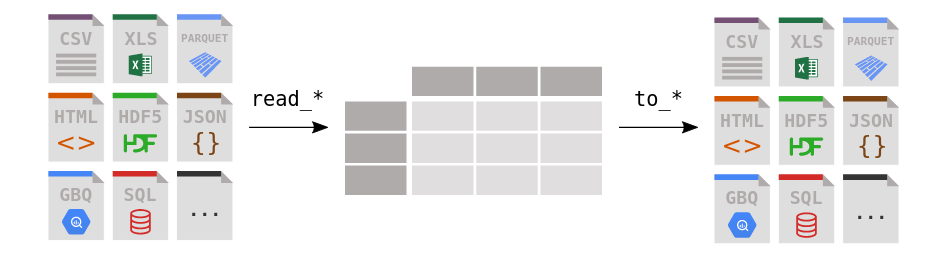

A seguir tem um exemplo desse dataset: https://www.kaggle.com/pedrohenriquecardoso/populacao-brasil

In [7]:
populacao = pd.read_csv("dataset/populacao.csv")

Para ver o tamanho dos dados:

In [8]:
populacao.shape

(5570, 5)

O tamanho destes dados são enormes! Vamos ler apenas as primeiras e as últimas linhas: 

In [9]:
populacao.head(3)

UF  COD. UF  COD. MUNIC      NOME DO MUNICÍPIO  POPULAÇÃO ESTIMADA
0  RO       11          15  Alta Floresta D'Oeste               22945
1  RO       11          23              Ariquemes              107863
2  RO       11          31                 Cabixi                5312

E os últimos:

In [10]:
populacao.tail(2)

UF  COD. UF  COD. MUNIC NOME DO MUNICÍPIO  POPULAÇÃO ESTIMADA
5568  GO       52       22302     Vila Propício                5821
5569  DF       53         108          Brasília             3015268

Para definir uma coluna como o índice do **DataFrame**:

In [ ]:
populacao = pd.read_csv("/content/sample_data/populacao.csv",index_col=2)
populacao

UF  COD. UF      NOME DO MUNICÍPIO  POPULAÇÃO ESTIMADA
COD. MUNIC                                                        
15          RO       11  Alta Floresta D'Oeste               22945
23          RO       11              Ariquemes              107863
31          RO       11                 Cabixi                5312
49          RO       11                 Cacoal               85359
56          RO       11             Cerejeiras               16323
...         ..      ...                    ...                 ...
22005       GO       52             Vianópolis               13863
22054       GO       52         Vicentinópolis                8743
22203       GO       52               Vila Boa                6171
22302       GO       52          Vila Propício                5821
108         DF       53               Brasília             3015268

[5570 rows x 4 columns]

Para salvar um **DataFrame** basta rodar o seguinte comando:

In [ ]:
populacao.to_csv('arquivo.csv')

# **Indexação, Seleção e Atribuição** #

Considerando os dados de população dos municípios do Brasil:

In [ ]:
import pandas as pd
populacao = pd.read_csv("/content/sample_data/populacao.csv")
pd.set_option('max_rows', 4)
populacao

UF  COD. UF  COD. MUNIC      NOME DO MUNICÍPIO  POPULAÇÃO ESTIMADA
0     RO       11          15  Alta Floresta D'Oeste               22945
1     RO       11          23              Ariquemes              107863
...   ..      ...         ...                    ...                 ...
5568  GO       52       22302          Vila Propício                5821
5569  DF       53         108               Brasília             3015268

[5570 rows x 5 columns]

Você pode acessar uma propriedade de um objeto:

In [ ]:
populacao.UF

0       RO
1       RO
        ..
5568    GO
5569    DF
Name: UF, Length: 5570, dtype: object

Note que para as demais, podemos usar dicionários também:

In [ ]:
populacao['NOME DO MUNICÍPIO']

0       Alta Floresta D'Oeste
1                   Ariquemes
                ...          
5568            Vila Propício
5569                 Brasília
Name: NOME DO MUNICÍPIO, Length: 5570, dtype: object

E para acessar um elemento qualquer, podemos usar o operador ```[]```:

In [ ]:
populacao['NOME DO MUNICÍPIO'][0]

"Alta Floresta D'Oeste"

### Indexação

### Manipulando o índice

In [ ]:
populacao.set_index('COD. MUNIC')

UF  COD. UF      NOME DO MUNICÍPIO  POPULAÇÃO ESTIMADA
COD. MUNIC                                                        
15          RO       11  Alta Floresta D'Oeste               22945
23          RO       11              Ariquemes              107863
...         ..      ...                    ...                 ...
22302       GO       52          Vila Propício                5821
108         DF       53               Brasília             3015268

[5570 rows x 4 columns]

### Seleção Condicional

Como comparar e selecionar valores?

In [ ]:
a=1
b=2
c=2

print(f'a=b? R: {a==b} | b=c? R: {b==c}')

a=b? R: False | b=c? R: True


Podemos fazer algo parecido para um objeto pandas e obter como retorno uma série com valores de verdadeiros e falsos

In [ ]:
populacao.UF=='RO'

0        True
1        True
        ...  
5568    False
5569    False
Name: UF, Length: 5570, dtype: bool

Isso pode ser utilizado juntamente com o *loc*:

In [ ]:
populacao.loc[populacao.UF == 'RO']

UF  COD. UF  COD. MUNIC      NOME DO MUNICÍPIO  POPULAÇÃO ESTIMADA
0   RO       11          15  Alta Floresta D'Oeste               22945
1   RO       11          23              Ariquemes              107863
..  ..      ...         ...                    ...                 ...
50  RO       11        1757          Vale do Anari               11204
51  RO       11        1807        Vale do Paraíso                6825

[52 rows x 5 columns]

Isso também pode ser combinado para fazer múltiplos "filtros":

In [ ]:
populacao.loc[(populacao.UF == 'RO') & (populacao['POPULAÇÃO ESTIMADA'] > 50000)]

UF  COD. UF  COD. MUNIC NOME DO MUNICÍPIO  POPULAÇÃO ESTIMADA
1   RO       11          23         Ariquemes              107863
3   RO       11          49            Cacoal               85359
..  ..      ...         ...               ...                 ...
19  RO       11         288    Rolim de Moura               55058
21  RO       11         304           Vilhena               99854

[7 rows x 5 columns]

In [ ]:
populacao.loc[(populacao.UF == 'AC') | (populacao.UF == 'BA')]

UF  COD. UF  COD. MUNIC    NOME DO MUNICÍPIO  POPULAÇÃO ESTIMADA
52    AC       12          13           Acrelândia               15256
53    AC       12          54         Assis Brasil                7417
...   ..      ...         ...                  ...                 ...
2242  BA       29       33505  Wenceslau Guimarães               21101
2243  BA       29       33604          Xique-Xique               46483

[439 rows x 5 columns]

Existe uma forma mais simples de filtrar valores em uma coluna de forma mais simplificada:

In [ ]:
populacao.loc[populacao.UF.isin(['BA', 'AC','MG','SP'])]

UF  COD. UF  COD. MUNIC NOME DO MUNICÍPIO  POPULAÇÃO ESTIMADA
52    AC       12          13        Acrelândia               15256
53    AC       12          54      Assis Brasil                7417
...   ..      ...         ...               ...                 ...
3910  SP       35       57204         Chavantes               12418
3911  SP       35       57303      Estiva Gerbi               11304

[1937 rows x 5 columns]

Outras funções úteis são:

In [ ]:
populacao.loc[populacao['POPULAÇÃO ESTIMADA'].isnull()]

Empty DataFrame
Columns: [UF, COD. UF, COD. MUNIC, NOME DO MUNICÍPIO, POPULAÇÃO ESTIMADA]
Index: []

### Atribuindo dados

Podemos atribuir valores para uma coluna no DataFrame:

In [ ]:
x = populacao
x['COD. MUNIC'] = 0
x['COD. MUNIC']

0       0
1       0
       ..
5568    0
5569    0
Name: COD. MUNIC, Length: 5570, dtype: int64

Podemos mudar o código de todos os municípios abaixo:

In [ ]:
x = populacao
x['COD. MUNIC'] = range(1,len(x)+1, 1)
x

UF  COD. UF  COD. MUNIC      NOME DO MUNICÍPIO  POPULAÇÃO ESTIMADA
0     RO       11           1  Alta Floresta D'Oeste               22945
1     RO       11           2              Ariquemes              107863
...   ..      ...         ...                    ...                 ...
5568  GO       52        5569          Vila Propício                5821
5569  DF       53        5570               Brasília             3015268

[5570 rows x 5 columns]

# **Funções Sumary e Mapas** #

### Funções Sumary

Algumas funções podem ser úteis para caracterizar de modo geral **Series** e **DataFrames**, vejamos algumas delas:

In [ ]:
populacao.UF.describe()
populacao.describe()

COD. UF  COD. MUNIC  POPULAÇÃO ESTIMADA
count  5570.000000     5570.00        5.570000e+03
mean     32.377738     2785.50        3.772839e+04
...            ...         ...                 ...
75%      41.000000     4177.75        2.549050e+04
max      53.000000     5570.00        1.225202e+07

[8 rows x 3 columns]

In [ ]:
populacao['POPULAÇÃO ESTIMADA'].mean()

37728.38868940754

In [ ]:
populacao.UF.unique()

array(['RO', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO', 'MA', 'PI', 'CE', 'RN',
       'PB', 'PE', 'AL', 'SE', 'BA', 'MG', 'ES', 'RJ', 'SP', 'PR', 'SC',
       'RS', 'MS', 'MT', 'GO', 'DF'], dtype=object)

In [ ]:
populacao.UF.value_counts()

MG    853
SP    645
     ... 
RR     15
DF      1
Name: UF, Length: 27, dtype: int64

### Mapas

Estes métodos ajudam a realizar diversas manipulações:

In [ ]:
populacao_media = populacao['POPULAÇÃO ESTIMADA'].mean()
populacao['POPULAÇÃO ESTIMADA'].map(lambda p: p - populacao_media)

0      -1.478339e+04
1       7.013461e+04
            ...     
5568   -3.190739e+04
5569    2.977540e+06
Name: POPULAÇÃO ESTIMADA, Length: 5570, dtype: float64

In [ ]:
def mudar_media(row):
    row['POPULAÇÃO ESTIMADA'] = row['POPULAÇÃO ESTIMADA'] - 1000
    return row

populacao.apply(mudar_media, axis='columns')

UF  COD. UF  COD. MUNIC      NOME DO MUNICÍPIO  POPULAÇÃO ESTIMADA
0     RO       11           1  Alta Floresta D'Oeste               21945
1     RO       11           2              Ariquemes              106863
...   ..      ...         ...                    ...                 ...
5568  GO       52        5569          Vila Propício                4821
5569  DF       53        5570               Brasília             3014268

[5570 rows x 5 columns]

In [ ]:
populacao

In [ ]:
populacao['POPULAÇÃO ESTIMADA'] - populacao['POPULAÇÃO ESTIMADA'].mean()

0      -1.478339e+04
1       7.013461e+04
            ...     
5568   -3.190739e+04
5569    2.977540e+06
Name: POPULAÇÃO ESTIMADA, Length: 5570, dtype: float64

In [ ]:
populacao['NOME DO MUNICÍPIO'] + ", " + populacao.UF

0       Alta Floresta D'Oeste, RO
1                   Ariquemes, RO
                  ...            
5568            Vila Propício, GO
5569                 Brasília, DF
Length: 5570, dtype: object

In [ ]:
x = populacao['NOME DO MUNICÍPIO'] + ", " + populacao.UF
for i in range(10): # Ou len(x)
  print(x[i])

Alta Floresta D'Oeste, RO
Ariquemes, RO
Cabixi, RO
Cacoal, RO
Cerejeiras, RO
Colorado do Oeste, RO
Corumbiara, RO
Costa Marques, RO
Espigão D'Oeste, RO
Guajará-Mirim, RO


# **Agrupamento e Ordenação** #

### Agrupamentos

Vamos começar importando o dataset

In [ ]:
import pandas as pd
populacao = pd.read_csv("/content/sample_data/populacao.csv")
pd.set_option('max_rows', 10)
populacao

UF  COD. UF  COD. MUNIC      NOME DO MUNICÍPIO  POPULAÇÃO ESTIMADA
0     RO       11          15  Alta Floresta D'Oeste               22945
1     RO       11          23              Ariquemes              107863
2     RO       11          31                 Cabixi                5312
3     RO       11          49                 Cacoal               85359
4     RO       11          56             Cerejeiras               16323
...   ..      ...         ...                    ...                 ...
5565  GO       52       22005             Vianópolis               13863
5566  GO       52       22054         Vicentinópolis                8743
5567  GO       52       22203               Vila Boa                6171
5568  GO       52       22302          Vila Propício                5821
5569  DF       53         108               Brasília             3015268

[5570 rows x 5 columns]

Vamos investigar alguns métodos de agrupamento:

In [ ]:
populacao.groupby('UF').UF.count()

UF
AC     22
AL    102
AM     62
AP     16
BA    417
     ... 
RS    497
SC    295
SE     75
SP    645
TO    139
Name: UF, Length: 27, dtype: int64

In [ ]:
populacao.groupby('UF')['POPULAÇÃO ESTIMADA'].mean()

UF
AC    40087.954545
AL    32719.186275
AM    66848.338710
AP    52858.187500
BA    35666.820144
          ...     
RS    22891.828974
SC    24287.416949
SE    30649.280000
SP    71192.324031
TO    11315.582734
Name: POPULAÇÃO ESTIMADA, Length: 27, dtype: float64

In [ ]:
x=populacao.groupby('UF').apply(lambda df: df['NOME DO MUNICÍPIO'].loc[df['POPULAÇÃO ESTIMADA'] == df['POPULAÇÃO ESTIMADA'].max()])
x

UF      
AC  66        Rio Branco
AL  1696          Maceió
AM  111           Manaus
AP  303           Macapá
BA  2162        Salvador
                ...     
RS  4931    Porto Alegre
SC  4447       Joinville
SE  1754         Aracaju
SP  3829       São Paulo
TO  443           Palmas
Name: NOME DO MUNICÍPIO, Length: 27, dtype: object

In [ ]:
a = populacao.groupby(['COD. UF', 'NOME DO MUNICÍPIO']).apply(lambda df: df.loc[df['POPULAÇÃO ESTIMADA'].idxmax()])
a

UF  ...  POPULAÇÃO ESTIMADA
COD. UF NOME DO MUNICÍPIO            ...                    
11      Alta Floresta D'Oeste    RO  ...               22945
        Alto Alegre dos Parecis  RO  ...               13241
        Alto Paraíso             RO  ...               21428
        Alvorada D'Oeste         RO  ...               14411
        Ariquemes                RO  ...              107863
...                              ..  ...                 ...
52      Vila Propício            GO  ...                5821
        Água Fria de Goiás       GO  ...                5735
        Água Limpa               GO  ...                1850
        Águas Lindas de Goiás    GO  ...              212440
53      Brasília                 DF  ...             3015268

[5570 rows x 5 columns]

In [ ]:
populacao.groupby(['UF'])['POPULAÇÃO ESTIMADA'].agg([len, min, max])

len   min       max
UF                     
AC   22  6540    407319
AL  102  2908   1018948
AM   62  2755   2182763
AP   16  5120    503327
BA  417  3161   2872347
..  ...   ...       ...
RS  497  1034   1483771
SC  295  1260    590466
SE   75  2374    657013
SP  645   837  12252023
TO  139  1112    299127

[27 rows x 3 columns]

### Multiplos-índices

É possível também trabalhar com múltiplos índices

In [ ]:
a

UF  ...  POPULAÇÃO ESTIMADA
COD. UF NOME DO MUNICÍPIO            ...                    
11      Alta Floresta D'Oeste    RO  ...               22945
        Alto Alegre dos Parecis  RO  ...               13241
        Alto Paraíso             RO  ...               21428
        Alvorada D'Oeste         RO  ...               14411
        Ariquemes                RO  ...              107863
...                              ..  ...                 ...
52      Vila Propício            GO  ...                5821
        Água Fria de Goiás       GO  ...                5735
        Água Limpa               GO  ...                1850
        Águas Lindas de Goiás    GO  ...              212440
53      Brasília                 DF  ...             3015268

[5570 rows x 5 columns]

In [ ]:
b=a['NOME DO MUNICÍPIO'].agg([len])
b

len
COD. UF NOME DO MUNICÍPIO           
11      Alta Floresta D'Oeste     21
        Alto Alegre dos Parecis   23
        Alto Paraíso              12
        Alvorada D'Oeste          16
        Ariquemes                  9
...                              ...
52      Vila Propício             13
        Água Fria de Goiás        18
        Água Limpa                10
        Águas Lindas de Goiás     21
53      Brasília                   8

[5570 rows x 1 columns]

In [ ]:
type(b.index)

pandas.core.indexes.multi.MultiIndex

In [ ]:
b.reset_index()


COD. UF        NOME DO MUNICÍPIO  len
0          11    Alta Floresta D'Oeste   21
1          11  Alto Alegre dos Parecis   23
2          11             Alto Paraíso   12
3          11         Alvorada D'Oeste   16
4          11                Ariquemes    9
...       ...                      ...  ...
5565       52            Vila Propício   13
5566       52       Água Fria de Goiás   18
5567       52               Água Limpa   10
5568       52    Águas Lindas de Goiás   21
5569       53                 Brasília    8

[5570 rows x 3 columns]

### Ordenação

Métodos para ordenação

In [ ]:
b.sort_values(by='len')

len
COD. UF NOME DO MUNICÍPIO                    
43      Ipê                                 3
29      Una                                 3
35      Jaú                                 3
26      Exu                                 3
31      Ubá                                 3
...                                       ...
33      São José do Vale do Rio Preto      29
31      São Sebastião da Vargem Alegre     30
25      São Sebastião de Lagoa de Roça     30
22      São Francisco de Assis do Piauí    31
51      Vila Bela da Santíssima Trindade   32

[5570 rows x 1 columns]

In [ ]:
b.sort_values(by='len', ascending=False)

len
COD. UF NOME DO MUNICÍPIO                    
51      Vila Bela da Santíssima Trindade   32
22      São Francisco de Assis do Piauí    31
31      São Sebastião da Vargem Alegre     30
25      São Sebastião de Lagoa de Roça     30
33      São José do Vale do Rio Preto      29
...                                       ...
35      Itu                                 3
        Uru                                 3
23      Icó                                 3
29      Una                                 3
24      Açu                                 3

[5570 rows x 1 columns]

In [ ]:
populacao


UF  COD. UF  COD. MUNIC      NOME DO MUNICÍPIO  POPULAÇÃO ESTIMADA
0     RO       11          15  Alta Floresta D'Oeste               22945
1     RO       11          23              Ariquemes              107863
2     RO       11          31                 Cabixi                5312
3     RO       11          49                 Cacoal               85359
4     RO       11          56             Cerejeiras               16323
...   ..      ...         ...                    ...                 ...
5565  GO       52       22005             Vianópolis               13863
5566  GO       52       22054         Vicentinópolis                8743
5567  GO       52       22203               Vila Boa                6171
5568  GO       52       22302          Vila Propício                5821
5569  DF       53         108               Brasília             3015268

[5570 rows x 5 columns]

In [ ]:
a = populacao.sort_values(by=['COD. UF','NOME DO MUNICÍPIO'])
a

UF  COD. UF  COD. MUNIC        NOME DO MUNICÍPIO  POPULAÇÃO ESTIMADA
0     RO       11          15    Alta Floresta D'Oeste               22945
25    RO       11         379  Alto Alegre dos Parecis               13241
26    RO       11         403             Alto Paraíso               21428
24    RO       11         346         Alvorada D'Oeste               14411
1     RO       11          23                Ariquemes              107863
...   ..      ...         ...                      ...                 ...
5568  GO       52       22302            Vila Propício                5821
5327  GO       52         175       Água Fria de Goiás                5735
5328  GO       52         209               Água Limpa                1850
5329  GO       52         258    Águas Lindas de Goiás              212440
5569  DF       53         108                 Brasília             3015268

[5570 rows x 5 columns]

In [ ]:
a.sort_index()

UF  COD. UF  COD. MUNIC      NOME DO MUNICÍPIO  POPULAÇÃO ESTIMADA
0     RO       11          15  Alta Floresta D'Oeste               22945
1     RO       11          23              Ariquemes              107863
2     RO       11          31                 Cabixi                5312
3     RO       11          49                 Cacoal               85359
4     RO       11          56             Cerejeiras               16323
...   ..      ...         ...                    ...                 ...
5565  GO       52       22005             Vianópolis               13863
5566  GO       52       22054         Vicentinópolis                8743
5567  GO       52       22203               Vila Boa                6171
5568  GO       52       22302          Vila Propício                5821
5569  DF       53         108               Brasília             3015268

[5570 rows x 5 columns]

# **Tipos de dados e falta de valores** #

Vamos importar o dataset

In [ ]:
import pandas as pd
populacao = pd.read_csv("/content/sample_data/populacao.csv")
pd.set_option('min_rows', 300)
populacao

UF  COD. UF  COD. MUNIC      NOME DO MUNICÍPIO  POPULAÇÃO ESTIMADA
0     RO       11          15  Alta Floresta D'Oeste               22945
1     RO       11          23              Ariquemes              107863
2     RO       11          31                 Cabixi                5312
3     RO       11          49                 Cacoal               85359
4     RO       11          56             Cerejeiras               16323
...   ..      ...         ...                    ...                 ...
5565  GO       52       22005             Vianópolis               13863
5566  GO       52       22054         Vicentinópolis                8743
5567  GO       52       22203               Vila Boa                6171
5568  GO       52       22302          Vila Propício                5821
5569  DF       53         108               Brasília             3015268

[5570 rows x 5 columns]

### Dtypes

Podemos usar o método **.dtypes** e **.dtype** para ver o(s) tipo(s) de um **DataFrame** e **Series**

In [ ]:
populacao.dtypes

UF                    object
COD. UF                int64
COD. MUNIC             int64
NOME DO MUNICÍPIO     object
POPULAÇÃO ESTIMADA     int64
dtype: object

In [ ]:
populacao['COD. MUNIC'].dtype

dtype('int64')

O tamanho desta coluna pode ser reduzido!

In [ ]:
populacao=populacao.astype({'COD. MUNIC': 'int16','COD. UF': 'int8','POPULAÇÃO ESTIMADA': 'float64'})
populacao.dtypes

UF                     object
COD. UF                  int8
COD. MUNIC              int16
NOME DO MUNICÍPIO      object
POPULAÇÃO ESTIMADA    float64
dtype: object

In [ ]:
populacao

UF  COD. UF  COD. MUNIC      NOME DO MUNICÍPIO  POPULAÇÃO ESTIMADA
0     RO       11          15  Alta Floresta D'Oeste             22945.0
1     RO       11          23              Ariquemes            107863.0
2     RO       11          31                 Cabixi              5312.0
3     RO       11          49                 Cacoal             85359.0
4     RO       11          56             Cerejeiras             16323.0
...   ..      ...         ...                    ...                 ...
5565  GO       52       22005             Vianópolis             13863.0
5566  GO       52       22054         Vicentinópolis              8743.0
5567  GO       52       22203               Vila Boa              6171.0
5568  GO       52       22302          Vila Propício              5821.0
5569  DF       53         108               Brasília           3015268.0

[5570 rows x 5 columns]

### Falta de valores

Suponha que nossos dados não possua alguns valores 

In [ ]:
populacao.loc[(populacao['NOME DO MUNICÍPIO'].str.contains("Vila"),'POPULAÇÃO ESTIMADA')]=float("NaN")
populacao

UF  COD. UF  COD. MUNIC      NOME DO MUNICÍPIO  POPULAÇÃO ESTIMADA
0     RO       11          15  Alta Floresta D'Oeste             22945.0
1     RO       11          23              Ariquemes            107863.0
2     RO       11          31                 Cabixi              5312.0
3     RO       11          49                 Cacoal             85359.0
4     RO       11          56             Cerejeiras             16323.0
...   ..      ...         ...                    ...                 ...
5565  GO       52       22005             Vianópolis             13863.0
5566  GO       52       22054         Vicentinópolis              8743.0
5567  GO       52       22203               Vila Boa                 NaN
5568  GO       52       22302          Vila Propício                 NaN
5569  DF       53         108               Brasília           3015268.0

[5570 rows x 5 columns]

Isso pode ser verificado usando o método a seguir:

In [ ]:
populacao.loc[populacao['POPULAÇÃO ESTIMADA'].isnull()]

UF  COD. UF  ...                 NOME DO MUNICÍPIO POPULAÇÃO ESTIMADA
663   MA       21  ...           Vila Nova dos Martírios                NaN
889   PI       22  ...                Vila Nova do Piauí                NaN
1241  RN       24  ...                         Vila Flor                NaN
3171  ES       32  ...                        Vila Pavão                NaN
3172  ES       32  ...                      Vila Valério                NaN
...   ..      ...  ...                               ...                ...
5096  RS       43  ...                  Vila Nova do Sul                NaN
5246  MT       51  ...  Vila Bela da Santíssima Trindade                NaN
5318  MT       51  ...                         Vila Rica                NaN
5567  GO       52  ...                          Vila Boa                NaN
5568  GO       52  ...                     Vila Propício                NaN

[15 rows x 5 columns]

É possível preencher esses valores com algum valor:

In [ ]:
populacao['POPULAÇÃO ESTIMADA']=populacao['POPULAÇÃO ESTIMADA'].fillna("Não Informado")
populacao

UF  COD. UF  COD. MUNIC      NOME DO MUNICÍPIO POPULAÇÃO ESTIMADA
0     RO       11          15  Alta Floresta D'Oeste              22945
1     RO       11          23              Ariquemes             107863
2     RO       11          31                 Cabixi               5312
3     RO       11          49                 Cacoal              85359
4     RO       11          56             Cerejeiras              16323
...   ..      ...         ...                    ...                ...
5565  GO       52       22005             Vianópolis              13863
5566  GO       52       22054         Vicentinópolis               8743
5567  GO       52       22203               Vila Boa      Não Informado
5568  GO       52       22302          Vila Propício      Não Informado
5569  DF       53         108               Brasília        3.01527e+06

[5570 rows x 5 columns]

E este método pode substituir um valor especificada por outro valor:

In [ ]:
populacao['POPULAÇÃO ESTIMADA']=populacao['POPULAÇÃO ESTIMADA'].replace("Não Informado", "Não Especificado")
populacao

UF  COD. UF  COD. MUNIC      NOME DO MUNICÍPIO POPULAÇÃO ESTIMADA
0     RO       11          15  Alta Floresta D'Oeste              22945
1     RO       11          23              Ariquemes             107863
2     RO       11          31                 Cabixi               5312
3     RO       11          49                 Cacoal              85359
4     RO       11          56             Cerejeiras              16323
...   ..      ...         ...                    ...                ...
5565  GO       52       22005             Vianópolis              13863
5566  GO       52       22054         Vicentinópolis               8743
5567  GO       52       22203               Vila Boa   Não Especificado
5568  GO       52       22302          Vila Propício   Não Especificado
5569  DF       53         108               Brasília        3.01527e+06

[5570 rows x 5 columns]

# **Renomeando e Combinando** #

### Renomeando

Vamos importar novamente o dataset:

In [ ]:
import pandas as pd
populacao = pd.read_csv("/content/sample_data/populacao.csv")
pd.set_option('min_rows', 300)
populacao

UF  COD. UF  COD. MUNIC      NOME DO MUNICÍPIO  POPULAÇÃO ESTIMADA
0     RO       11          15  Alta Floresta D'Oeste               22945
1     RO       11          23              Ariquemes              107863
2     RO       11          31                 Cabixi                5312
3     RO       11          49                 Cacoal               85359
4     RO       11          56             Cerejeiras               16323
...   ..      ...         ...                    ...                 ...
5565  GO       52       22005             Vianópolis               13863
5566  GO       52       22054         Vicentinópolis                8743
5567  GO       52       22203               Vila Boa                6171
5568  GO       52       22302          Vila Propício                5821
5569  DF       53         108               Brasília             3015268

[5570 rows x 5 columns]

Renomear os nomes das colunas e linhas pode ser feito usando o método **.rename()**:

In [ ]:
populacao=populacao.rename(columns={'UF': 'uf','COD. UF':'coduf','COD. MUNIC':'codmunic','NOME DO MUNICÍPIO':'nome','POPULAÇÃO ESTIMADA':'pessoas'})
populacao

uf  coduf  codmunic                   nome  pessoas
0     RO     11        15  Alta Floresta D'Oeste    22945
1     RO     11        23              Ariquemes   107863
2     RO     11        31                 Cabixi     5312
3     RO     11        49                 Cacoal    85359
4     RO     11        56             Cerejeiras    16323
...   ..    ...       ...                    ...      ...
5565  GO     52     22005             Vianópolis    13863
5566  GO     52     22054         Vicentinópolis     8743
5567  GO     52     22203               Vila Boa     6171
5568  GO     52     22302          Vila Propício     5821
5569  DF     53       108               Brasília  3015268

[5570 rows x 5 columns]

Agora o ```populacao['NOME DO MUNICÍPIO']``` pode ser acessado através da seguinte sintaxe:

In [ ]:
populacao.nome

0       Alta Floresta D'Oeste
1                   Ariquemes
2                      Cabixi
3                      Cacoal
4                  Cerejeiras
                ...          
5565               Vianópolis
5566           Vicentinópolis
5567                 Vila Boa
5568            Vila Propício
5569                 Brasília
Name: nome, Length: 5570, dtype: object

Também é possível renomeiar os índices:

In [ ]:
populacao.rename(index={0:'Primeira cidade',1:'Segunda cidade'})

uf  coduf  codmunic                   nome  pessoas
Primeira cidade  RO     11        15  Alta Floresta D'Oeste    22945
Segunda cidade   RO     11        23              Ariquemes   107863
2                RO     11        31                 Cabixi     5312
3                RO     11        49                 Cacoal    85359
4                RO     11        56             Cerejeiras    16323
...              ..    ...       ...                    ...      ...
5565             GO     52     22005             Vianópolis    13863
5566             GO     52     22054         Vicentinópolis     8743
5567             GO     52     22203               Vila Boa     6171
5568             GO     52     22302          Vila Propício     5821
5569             DF     53       108               Brasília  3015268

[5570 rows x 5 columns]

Renomear as colunas pode ser muito útil e provavelmente isso é bastante utilizado, mas para renomear índices. Como as colunas e os índices possuem o atributo ```name```, é mais conveniente mudar este nome através do método **.rename_axis()**:

In [ ]:
populacao.rename_axis("cidade", axis='rows').rename_axis("info", axis='columns')

info    uf  coduf  codmunic                   nome  pessoas
cidade                                                     
0       RO     11        15  Alta Floresta D'Oeste    22945
1       RO     11        23              Ariquemes   107863
2       RO     11        31                 Cabixi     5312
3       RO     11        49                 Cacoal    85359
4       RO     11        56             Cerejeiras    16323
...     ..    ...       ...                    ...      ...
5565    GO     52     22005             Vianópolis    13863
5566    GO     52     22054         Vicentinópolis     8743
5567    GO     52     22203               Vila Boa     6171
5568    GO     52     22302          Vila Propício     5821
5569    DF     53       108               Brasília  3015268

[5570 rows x 5 columns]

### Combinando

Suponha que metade das nossa **CIDADES** estejm em um **DataFrame** e a outra metade em outro **DataFrame**, podemos combinar estas informações usando **.concat()**

In [ ]:
popA = populacao.loc[0:2784,:]
popB = populacao.loc[2785:5570,:]
pd.concat([popA, popB])

uf  coduf  codmunic                   nome  pessoas
0     RO     11        15  Alta Floresta D'Oeste    22945
1     RO     11        23              Ariquemes   107863
2     RO     11        31                 Cabixi     5312
3     RO     11        49                 Cacoal    85359
4     RO     11        56             Cerejeiras    16323
...   ..    ...       ...                    ...      ...
5565  GO     52     22005             Vianópolis    13863
5566  GO     52     22054         Vicentinópolis     8743
5567  GO     52     22203               Vila Boa     6171
5568  GO     52     22302          Vila Propício     5821
5569  DF     53       108               Brasília  3015268

[5570 rows x 5 columns]

E para o caso de termos 2 **DataFrames** com todas as cidades, mas cada DataFrame tem metade das informações, podemos combinar utilizando o mesmo método:

(Note que no exemplo abaixo, foi combinado os mesmos **DataFrame**'s, aqueles parâmetros adicionais podem criar um sufixo caso os **DataFrame**'s combinados os mesmos nomes de coluna:

In [ ]:
popA = populacao.iloc[:,0:3]
popB = populacao.iloc[:,3:5]

popA.join(popA, lsuffix='_A', rsuffix='_B')

uf_A  coduf_A  codmunic_A uf_B  coduf_B  codmunic_B
0      RO       11          15   RO       11          15
1      RO       11          23   RO       11          23
2      RO       11          31   RO       11          31
3      RO       11          49   RO       11          49
4      RO       11          56   RO       11          56
...   ...      ...         ...  ...      ...         ...
5565   GO       52       22005   GO       52       22005
5566   GO       52       22054   GO       52       22054
5567   GO       52       22203   GO       52       22203
5568   GO       52       22302   GO       52       22302
5569   DF       53         108   DF       53         108

[5570 rows x 6 columns]

Note que mesmo passado estes parâmetros, os sufixos não foram criados, porque todas as colunas são diferentes: 

In [ ]:
popA.join(popB) # popA.join(popB)

uf  coduf  codmunic                   nome  pessoas
0     RO     11        15  Alta Floresta D'Oeste    22945
1     RO     11        23              Ariquemes   107863
2     RO     11        31                 Cabixi     5312
3     RO     11        49                 Cacoal    85359
4     RO     11        56             Cerejeiras    16323
...   ..    ...       ...                    ...      ...
5565  GO     52     22005             Vianópolis    13863
5566  GO     52     22054         Vicentinópolis     8743
5567  GO     52     22203               Vila Boa     6171
5568  GO     52     22302          Vila Propício     5821
5569  DF     53       108               Brasília  3015268

[5570 rows x 5 columns]

Isso é tudo pessoal!